In [ ]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

In [1]:
df2016 <- read.csv("../input/air-pollution-dataset-india20162018/2016_india.csv")
df2017 <- read.csv("../input/air-pollution-dataset-india20162018/2017_india.csv")
df2018 <- read.csv("../input/air-pollution-dataset-india20162018/2018_india.csv")


#Combining the Dataframes for the various years
df <- rbind(df2016, df2017)
df <- rbind(df, df2018)

In [2]:
#Summary statistics
summary(df)
cat("Total number of rows in the dataset = ",nrow(df))



                                          location              city        
 Maharashtra Pollution Control Board - Solapur: 203732   Delhi    : 982903  
 Maharashtra Pollution Control Board Bandra   : 187847   Hyderabad: 418590  
 Ardhali Bazar                                : 159878   Bengaluru: 333116  
 Nehru Nagar                                  : 151012   Mumbai   : 266657  
 Chandrapur                                   : 143572   Lucknow  : 263059  
 Collectorate Jodhpur - RSPCB                 : 138175   Chennai  : 254636  
 (Other)                                      :5379068   (Other)  :3844323  
 country                            utc         
 IN:6363284   2018-03-20T19:30:00.000Z:    574  
              2018-03-21T06:30:00.000Z:    571  
              2018-03-20T20:30:00.000Z:    570  
              2018-03-21T19:30:00.000Z:    570  
              2018-03-22T06:30:00.000Z:    570  
              2018-03-20T21:30:00.000Z:    569  
              (Other)                 :63

Total number of rows in the dataset =  6363284

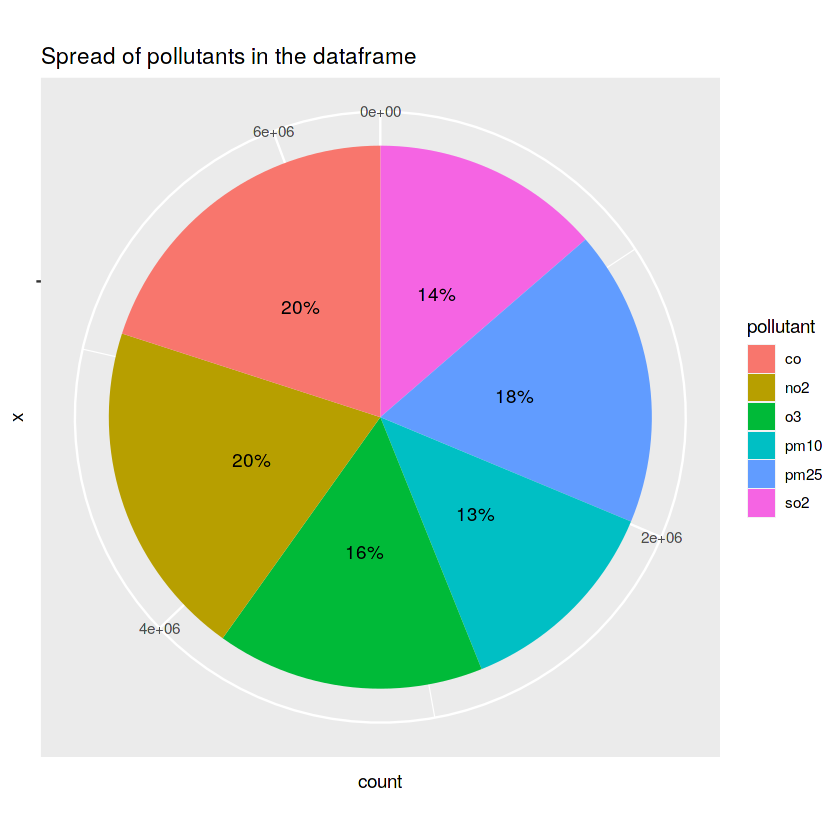

In [3]:
#Pie chart to check the different types of pollutants under consideration
df_pie<- as.data.frame(table(df$parameter))
colnames(df_pie)=c("pollutant","count")

library(ggplot2)
# Barplot
bp<- ggplot(df_pie, aes(x="", y=count, fill=pollutant))+
geom_bar(width = 1, stat = "identity")
pie <- bp + coord_polar("y", start=0)
pie<-pie+labs(title="Spread of pollutants in the dataframe")+geom_text(aes(label = paste0(round(count*100/nrow(df)), "%")), position = position_stack(vjust = 0.5))
pie

Number of negative rows =  19860
Show below is the number of NA entries in each column

location        city     country         utc       local   parameter 
          0           0           0           0           0           0 
      value        unit    latitude   longitude attribution 
          0           0     2169618     2169618           0

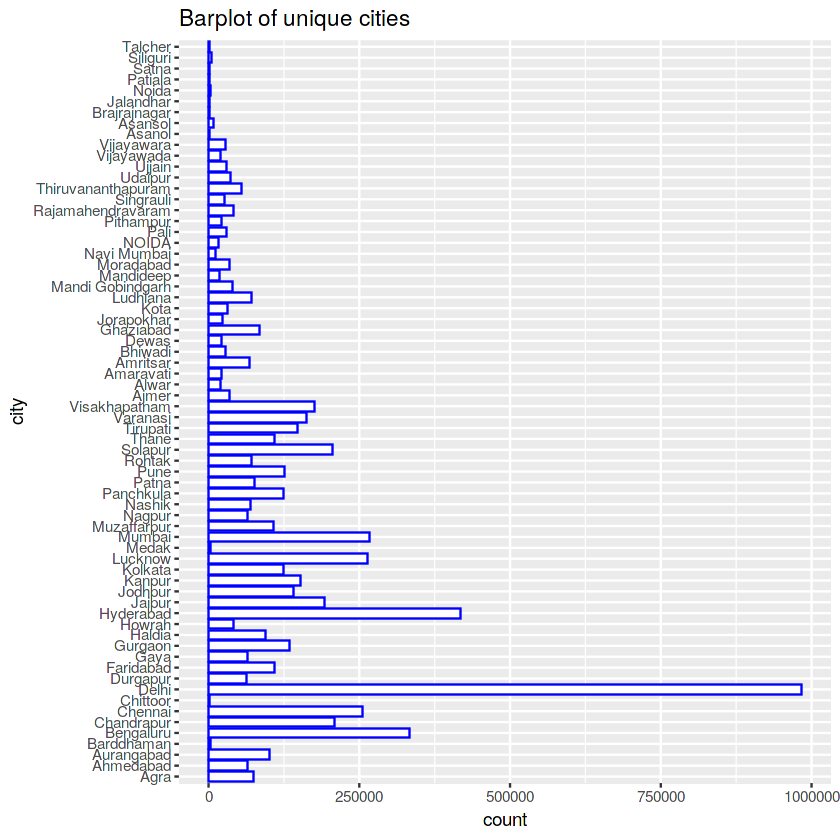

In [4]:
#Looking at how many cities are there and what is the spread

cities_table<-as.data.frame(table(df$city))
colnames(cities_table)=c("city","count")
p<-ggplot(cities_table, aes(x=city, y=count)) +
  geom_bar(stat="identity",color="blue", fill="white")+labs(title="Barplot of unique cities")
p + coord_flip()

#Negative values of Value atrributes
df_neg=df[df$value<0,]
cat("Number of negative rows = ",nrow(df_neg))

#Missing Values
cat("\nShow below is the number of NA entries in each column")
sapply(df, function(x) sum(is.na(x)))


We observe that there are a lot of rows in Delhi compared to the other cities.
Following Delhi we have Hyderabd and then Namma Bengaluru.
There seems to be a lot of missing values in Latitude longitude.
An effort can be made to check if the values can be filled using existing rows in the dataset if the cities match.